<center><font size=6>What's in Python's belly?</font></center>

 <center>Pierre ALBARÈDE</center>

Drawing from A. de Saint-Exupéry, in <cite>Le petit prince</cite>.

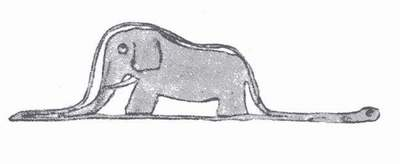

# Introduction

## Interfaces

Jupyter Notebook is the program used to make and interact with this notebook.  A program (or code) cell can be evaluated by selecting it and pressing SHIFT RETURN.

In [1]:
1+1

2

The kernel is the program in charge of evaluating program cells.  Jupyter Notebook is a graphical interface to the kernel. Many kernels are possible, the running kernel can be checked in the notebook menu Help > About.

Apart from Jupyter Notebook, other interfaces to Python, are, for example, IPython and Bpython.  Jupyter Notebook is built on IPython.

In a comment cell like this one, Jupyter Notebook interprets $\LaTeX$, <b>HTML</b> and <a href="https://www.markdownguide.org/getting-started/"><cite>Markdown</cite></a> like **this** or `In[_]`.  Clicking the cell shows its source code.

The output of any program cell depends on previous program cell evaluations.  

This notebook has automatic initialization cells (so that `In` number is not `1` in the first cell that you evaluate).

I will try to make each program cell evaluation depend at most on initialization and previous program cells in the same notebook section, so that any result can be reproduced by evaluating at most a section, not the entire notebook.

Restart without initialization:

In [1]:
quit() # repeat until In[1]

In [1]:
1 # In[1] ⇒ no initialization

1

Restart the kernel from Jupyter Notebook Kernel menu (or type 0 0).

In [10]:
1 # In number > 1

1

Within a cell, inputs to the Python kernel can be separated by newline:

In [24]:
1
2

1

2

Semicolumn separates and suppresses output but not printout:

In [26]:
1;print('hello');2

1

hello


2

Help yourself:

In [28]:
#help(help)

## IPython interactive features

### Autocompletion and pop-up help

Typing TAB shows a menu with possible completions:

In [ ]:
h

The pop-up help shows help on IPython interactive features:

In [29]:
?

In [30]:
??

In [31]:
???

Object `?` not found.


In [32]:
help?

In [33]:
?quit

In [34]:
quit??

### Magic

In [72]:
%automagic # set to OFF to avoid confusion


Automagic is OFF, % prefix IS needed for line magics.


In [39]:
%magic

Recall input ready to be edited and evaluated:

In [30]:
%recall 26 # adjust number to existing

In [41]:
%timeit range(1000)

51 ns ± 0.0676 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [42]:
%pwd

"/home/alba/Documents/projet/Python's belly"

Cell magic:

In [1]:
%%latex 
\[\frac{a x+y}{b x+y}\]


<IPython.core.display.Latex object>

### Call Unix shell

In [52]:
!ps
!pwd
!python --version
!python -c 'print(2+2)'
!ipython --version

    PID TTY          TIME CMD
  11890 pts/2    00:00:00 ps
/home/alba/Documents/projet/Python's belly
Python 3.11.9
4
9.1.0


### History

In [57]:
1+1

2

In [58]:
3

3

`_` recalls last output, `__` recalls next last output:

In [59]:
__**_

8

In [60]:
___

2

In [ ]:
# ____ # error

In [61]:
print(3)

3


**Printout differs from output** because it cannot be directly reused in Python or IPython, it is just a visible side effect:

In [62]:
_

2

Recall output or input by number:

In [45]:
Out[42] # adjust number to existing

2

In [48]:
In[47]  # adjust number to existing

'1+1'

# Call and recall object

## Name

Call or define:

In [3]:
x=5-3 # no output

Recall:

In [2]:
x

2

In [66]:
x+x*x

6

Define inside expression with the walrus operator :=

In [7]:
print(x:=3,'petits cochons');x

3 petits cochons


3

Undefine:

In [69]:
del x

Not every name is possible:

In [ ]:
# del=1 # error: can't use name 'del'

Multiple and chained define:

In [6]:
x,y=2,3
x,y

(2, 3)

In [71]:
x=y=4 
x,y

(4, 4)

Multiple undefine:

In [72]:
del x,y

## Function

Function is like name with parameters:

In [73]:
def double(n):
    return 2*n

In [74]:
type(double)

function

In [75]:
double(10)

20

In [76]:
def fsum(x,y):return x+y
fsum(2,3)

5

In [77]:
def double(n):return 3*n
double(10)

30

Function with 0 parameter is like name:

In [10]:
def proc1():return 123
proc1()

123

In [11]:
x=proc1
x()

123

`quit` is a function with 0 parameter.

In [ ]:
# quit()

In IPython, an autocallable function is a function that can be called without parentheses, like `quit`:

In [12]:
quit

Python word that is not name or function, like <code>del, def, return</code>, is keyword.

In Python version 2.7, `print` was keyword, now in Python 3 `print` is function.

## Namespace

A global definition is always available until quit:

In [80]:
x=3

In [ ]:
# globals() # try this and look for x in output

A function has its own local namespace:

In [81]:
x=3
y='whatever';del y
def function1(x):
    y=2
    print(locals())
    return x+y
    
function1(4)

x
# y # error

{'x': 4, 'y': 2}


6

3

Default behaviour can be altered (but this may be confusing).  From the Python tutorial:

In [3]:
def scope_test():
    def do_local():
        spam = "local spam"

    def do_nonlocal():
        nonlocal spam
        spam = "nonlocal spam"
        
    def do_global():
        global spam
        spam = "global spam"
        
    spam = "test spam"
    do_local()
    print("After local assignment:", spam)
    do_nonlocal()
    print("After nonlocal assignment:", spam)
    do_global()
    print("After global assignment:", spam)

scope_test()
print("In global scope after scope_test:", spam)

After local assignment: test spam
After nonlocal assignment: nonlocal spam
After global assignment: nonlocal spam
In global scope after scope_test: global spam


## Module

A module is a separate program unit, also with its own local namespace, accessed with a particular syntax using `.`:

In [2]:
import keyword
print(keyword.kwlist) # all keywords

['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']


In [83]:
import datetime
datetime.datetime.now()

datetime.datetime(2023, 7, 7, 19, 5, 9, 545034)

In [13]:
# !pip install chime # if you don't have it
import chime 
chime.error() # change number

Get all outputs (not only the last one) from the same program cell even after non final `;`:

In [109]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
17-2
17/5;
17//5
17%5
17**2

15

3.4

3

2

289

Importing into the global namespace:

In [3]:
from random import random
random()

0.43491929890172687

In [4]:
random()

0.2889314666773227

Change something in a module:

In [5]:
import math
math.pi
math.pi=22/7
math.pi

3.141592653589793

3.142857142857143

How to restore?  <code>import</code> again does not work:

In [6]:
del math
import math
math.pi

3.142857142857143

This does not work:

In [7]:
import importlib
importlib.reload(math)
math.pi

<module 'math' from '/home/alba/.conda/envs/my_base/lib/python3.11/lib-dynload/math.cpython-311-x86_64-linux-gnu.so'>

3.142857142857143

The safest way to restore a module is to restart the program using it (in Jupyter Notebook restart the kernel).

This works too:

In [8]:
import sys
del sys.modules['math']
import math
math.pi

3.141592653589793

# Some basic types, type conversion

## Numbers

### Integer

In [98]:
type(0)

int

In [99]:
2+3;2*3;2+3*4;(2+3)*4

5

6

14

20

Euclidean division:

In [4]:
17//5;17%5;divmod(17,5)


3

2

(3, 2)

In [ ]:
# 1/0 # error

In [101]:
1**0

1

A Python bug:

In [5]:
0**0 # mathemetically undefined

1

In [103]:
int1=1245312314342342342342342342342342342342342344243
int1+1

1245312314342342342342342342342342342342342344244

In [104]:
abs(-1)

1

### Float

In [105]:
type(0.)

float

In [106]:
2**(1/2)

1.4142135623730951

In [107]:
abs(-1.)

1.0

Type conversion:

In [108]:
int(1.99)
int(1.999999999999999999999)
float(2)

1

2

2.0

Infinity:

In [111]:
1+float('inf')
2*float('inf')

inf

inf

In [112]:
type(_)

float

In [113]:
1245312314342342342342342342342342342342342344243<float('inf')

True

In [114]:
import math

In [116]:
math.nan?

In [117]:
type(math.nan)

float

In [119]:
math.nan-math.nan

nan

In [121]:
math.nan==math.nan
math.nan!=math.nan

False

True

True

### Complex

In [122]:
type(1j)

complex

In [123]:
(1+2j)**2
(1j)**2

(-3+4j)

(-1+0j)

In [124]:
abs(1+1j)

1.4142135623730951

In [125]:
type(complex(0,0))

complex

In [126]:
complex(1,2)-(1+2j)

0j

In [127]:
complex(1,2)**2

(-3+4j)

## Non numbers

### Boolean

In [128]:
type(True)

bool

In [129]:
not True

False

In [130]:
True&False==False # and
True&True==True
False|True==True  # or
False|False==False
True^True==False  # xor
True^False==True
False^False==False

True

True

True

True

True

True

True

In [131]:
True and False
True or False

False

True

In [132]:
int(True)
bool(0)
bool(1)
bool(-1)

1

False

True

True

In [133]:
1<=1
1<1

True

False

### String, hash, slice, docstring

In [149]:
type('a')

str

`hash` is a numerical function used for quick sorting and identification:

In [2]:
hash('''Lorem ipsum dolor sit amet, consectetur 
adipiscing elit, sed do eiusmod tempor incididunt 
ut labore et dolore magna aliqua. Ut enim ad minim 
veniam, quis nostrud exercitation ullamco laboris 
nisi ut aliquip ex ea commodo consequat. Duis aute 
irure dolor in reprehenderit in voluptate velit esse 
cillum dolore eu fugiat nulla pariatur. Excepteur 
sint occaecat cupidatat non proident, sunt in culpa 
qui officia deserunt mollit anim id est laborum.''')

-7019190548992195048

Two objects that compare equal must also have the same hash value, but the
reverse is not necessarily true.

In [186]:
'je  '+"suis"

'je  suis'

In [187]:
'a'*10

'aaaaaaaaaa'

In [188]:
'abcd'[1:3]

'bc'

In [189]:
'ssttuuppiidd'[::2]

'stupid'

In [191]:
str1='58454542'
str1[:-2]+','+str1[-2:]

'584545,42'

In [211]:
t="123456"
t[1:5]
t[1:5:1] # slice step 
t[1:5:2]
t[1:5:-1] 
t[5:1]
t[5:1:-1]
t[::-1]

'2345'

'2345'

'24'

''

''

'6543'

'654321'

In [208]:
'abcd'[3:1:-1]

'dc'

In [209]:
x=int('123')

In [193]:
str(123)

'123'

String on many lines separated by \\:

In [194]:
'string \
on many lines'

'string on many lines'

In [171]:
x="""string on
many lines 
without backslash
"""
x
print(x)
type(x)

'string on\nmany lines \nwithout backslash\n'

string on
many lines 
without backslash



str

In [176]:
""" an unnamed string
can be used 
as a mutiline comment,
it is more practical than adding # to every line
""";

Function docstring integrates comment to help:

In [178]:
def double(n):
    """returns double
    bla bla bla"""
    return 2*n

In [179]:
help(double)

Help on function double in module __main__:

double(n)
    returns double
    bla bla bla



**String containing special character**

In [184]:
'"'

'"'

In [185]:
"'"

"'"

In [182]:
# "\" # error

In [183]:
"\\"

'\\'

**String pattern matching and rule substitution**

In [220]:
# regular expression
from re import match,sub

In [221]:
if match(".*o.*","bob"):
    print('match')
    
if match(".*o.*","bab"):print('match')
else: print('no match')

sub("b(.)b","X","bobaobab")


match
no match


'XaoX'

In [222]:
match(".*o.*","bob")

<re.Match object; span=(0, 3), match='bob'>

In [223]:
match(".*o.*","bab")

In [224]:
sub("b.b","X","bobaobab")

'XaoX'

### Tuple

In [6]:
type((1,1,1,1))
hash((1,1,1,1))

tuple

-84722638022233667

In [136]:
(2,1)==(1,2)

False

In [137]:
(1,2,3)*2
(1,2,3)+(1,2,3)
# (1,2,3)+1 # error

(1, 2, 3, 1, 2, 3)

(1, 2, 3, 1, 2, 3)

In [138]:
type(())

tuple

As parenthesis not only serve for tuples but also for grouping,a single, that is a tuple of multiplicity one, cannot be written as

In [139]:
(0)

0

but this works:

In [140]:
0,

(0,)

In [143]:
1,1

(1, 1)

In [144]:
(1,2,3)[2]
((3,1,2),(2,0))[1][-1] # nested

3

0

Slice:

In [212]:
t=(1,2,3,4,5,6)
t[1:5]
t[1:5:1] # slice step 
t[1:5:2]
t[1:5:-1] 
t[5:1]
t[5:1:-1]
t[::-1]

(2, 3, 4, 5)

(2, 3, 4, 5)

(2, 4)

()

()

(6, 5, 4, 3)

(6, 5, 4, 3, 2, 1)

### List

Square brackets can be used not only for positional arguments but also lists:

In [195]:
type([])

list

In [196]:
[0]*5

[0, 0, 0, 0, 0]

In [7]:
[1,2]+[3,4]

[1, 2, 3, 4]

In [9]:
# hash(_) # error: non hashable

In [202]:
[['a','b','c'],(1,2,3)][0][-1]


'c'

### Set

In [11]:
type({2,1})

set

In [231]:
{1,2}=={2,1}

True

In [ ]:
# {1,2,3}+{3,4} # error

In [234]:
# {3,2,1}[1] # error: not subscriptable

In [216]:
{1,2,3}|{1,4}
{1,2,3}-{1,4}
{1,2,3}&{1,4}

{1, 2, 3, 4}

{2, 3}

{1}

Empty set:

In [217]:
{1}-{1}

set()

In [218]:
set("parisien")==set("aspirine")

True

Set element must be hashable for sorting but set itself is not hashable, hence Python does not allow set of set:

In [ ]:
# hash({1}) # error: non hashable

In [ ]:
# {{1}} # error

### Dictionary

A dictionary works like a discrete function, except that <code>[]</code> replaces <code>()</code>:

In [14]:
factorial={0:1,1:1,2:2,3:6}
type(factorial)
factorial[1]
factorial[2]

dict

1

2

In [16]:
# hash(factorial) # error: non hashable

In [409]:
type({}) # not empty set

dict

In [235]:
{0:1,1:1,2:2,3:6,0:1000}

{0: 1000, 1: 1, 2: 2, 3: 6}

In [237]:
{0:1,1:1,2:2,3:6}=={0:1,3:6,1:1,2:2}

True

Namespace uses dictionary:

In [17]:
globals()['__name__']

'__main__'

# Algebra with `sympy`

Evaluating an undefined name produces an error, Python can't hold symbols:

In [ ]:
# del x,y
# x   # error
# x-x # error
# x=y # error

Hold symbolic expression as string and use substitution:

In [146]:
from re import match,sub

In [147]:
sub("(.*)\+(.*)",r"\2+\1","x+y")
sub("(.*)\+(.*)",r"\2+\1","y+z")


'y+x'

'z+y'

In [148]:
sub("(.*)-\\1","0","x-x")
sub("(.*)-\\1","0","y-y")

'0'

'0'

Release hold with exec:

In [248]:
exec(sub('y','2',sub('x','1','sum1=x+y')))
sum1

3

In [249]:
from sympy import var

In [250]:
var('x,y')

(x, y)

In [251]:
type(x)

sympy.core.symbol.Symbol

In [252]:
x # LaTeX format in notebook output
x-x

x

0

In [253]:
expr=(x+y)**3
expr

expr1=expr.expand()
expr1

expr1.factor()

(x + y)**3

x**3 + 3*x**2*y + 3*x*y**2 + y**3

(x + y)**3

# Procedural program

## Variable

A variable (name) is a name that can have different successive values in a program, as opposed to a constant (name). 

In [263]:
x=2;x
x=3;x

2

3

In [264]:
x=0;x
x+=2;x
x*=3;x

0

2

6

A procedural program is a program using at least one variable.  The debugging problem: what is the value of a variable at any time or location in a program?

## Mutable, hashable types

List:

In [265]:
list1=[1,2,3]
list1[1]=100
list1

[1, 100, 3]

This works but is useless if the objects cannot be recalled:

In [20]:
[1,2,3][1]=30

Mutable implies non hashable (hashable implies non mutable):

In [ ]:
# hash(list1) # error: non hashable

Set:

In [267]:
set1={1,2,4}
set1|={3,4}
set1

{1, 2, 3, 4}

Dictionnary:

In [272]:
birthdates={'Robert':'19450510','Géal':'19181111'}
birthdates

{'Robert': '19450510', 'Géal': '19181111'}

Not only entries can be modified but entries can be added or deleted:

In [273]:
birthdates['Robert']='19450511'
birthdates['Reynier']='18950405'

In [274]:
del birthdates['Géal']
birthdates

{'Robert': '19450511', 'Reynier': '18950405'}

In [275]:
birthdates

{'Robert': '19450511', 'Reynier': '18950405'}

In [280]:
tuple1=(1,2,3)
# tuple1[1]=4 # error

In [281]:
hash(tuple1) # hashable implies immutable

529344067295497451

In [282]:
str1="abc"
# str1[1]='x' # error

Immutable does not imply constant:

I have read Jeff Knupp https://jeﬀknupp.com.

In [283]:
first_names=['Fred','George','Bill']
last_names=['Smith','Jones','Williams']
name_tuple=(first_names,last_names) # tuple: immutable
name_tuple
first_names+=['Igor']
name_tuple

(['Fred', 'George', 'Bill'], ['Smith', 'Jones', 'Williams'])

(['Fred', 'George', 'Bill', 'Igor'], ['Smith', 'Jones', 'Williams'])

However:

In [284]:
first_names=['Fred','George','Bill']
last_names=['Smith','Jones','Williams']
name_tuple=(first_names,last_names)
name_tuple
first_names=['Fred','George','Bill','Igor']
name_tuple

(['Fred', 'George', 'Bill'], ['Smith', 'Jones', 'Williams'])

(['Fred', 'George', 'Bill'], ['Smith', 'Jones', 'Williams'])

## Procedure

A procedure is a function that has side effets, interacts with the environment apart from parameter list input and standard output (from `return`): 
- uses as input a variable that is not a parameter,

- touches a namespace other than its own, 

- prints, beeps, quits...  

Thus programming with procedure implies procedural programming.

For example:

In [291]:
def procedure(l,w,h):
    global length,width,height
    length=l
    width=w
    height=h
    print(length*width*height)

In [292]:
procedure(31,40,50)

62000


In [293]:
length

31

`random` uses a seed variable that is not a parameter.

`datetime` uses a clock variable that is not a parameter.

`print` has non standard output.

## Pass by value or reference?

I have read Jeff Knupp https://jeﬀknupp.com.  Pass is by name (object reference).

If the argument is immutable, any attempt at changing it in the function will actually create an equivalent local variable, as if the argument was passed by value:

In [287]:
def ref_demo(x):x+=2;print(x)

x=9 # 9 is immutable
ref_demo(x) 
x

11


9

If the argument is mutable, it can be changed in the function, this is a side effect, as if the argument was passed by reference:

In [288]:
def ref_demo1(x):x[-1]=42
    
list1=[1,2,3] 
ref_demo1(list1)
list1

[1, 2, 42]

However:

In [290]:
def ref_demo2(x):x=[1,2,42] # new object created
    
list1=[1,2,3]
ref_demo2(list1)
list1


[1, 2, 3]

## Branching keywors

### Match case

New in Python 3.10.

In [294]:
def factorial(n):
    match n:
        case 0:
            return 1
        case _: # anything
            return n*factorial(n-1)
factorial(3)

6

### Try except

In [296]:
x=0
try:1/x 
except ZeroDivisionError:print("division by zero")
print("but the program goes on")

division by zero
but the program goes on


Exercice. 

In [300]:
x=2
del x
# del x # error: NameError not define

Undefine silently (without error message), even if name is not defined:

In [309]:
x=2
str1='x'
exec('del '+str1)
try:
    x
except NameError:
    "x was deleted"

'x was deleted'

In [110]:
def silentdel(str1):
    try:
        exec('del '+str1,globals())
    except NameError:
        pass # do nothing

In [303]:
x='whatever'
silentdel('x')
try:x
except NameError:'x was deleted'
silentdel('x') # no error

'x was deleted'

In [17]:
x='whatever'
y='anything'
silentdel('x,y')
# x # error
# y # error
silentdel('x,y')

This is simpler:

In [306]:
def silentdel1(str1):
    exec(str1+"='whatever'",globals())
    exec('del '+str1,globals())

In [307]:
x=1
silentdel1('x')
try:x
except NameError:'x was deleted'
silentdel1('x')

'x was deleted'

### If else elif

In [321]:
x=2
if x!=0:
    1/x
else: "division par zéro"

0.5

In [322]:
x=0
if x!=0:1/x 
else:"division par zéro"

'division par zéro'

In [323]:
if not False:True

True

In [324]:
if True:
    print("Hello")
elif True:
    print("Bonjour")
else: 
    print("Bom dia")
print('end')

Hello
end


In [325]:
if False:
    print("Hello")
elif True:
    print("Bonjour")
else: 
    print("Bom dia")
print('end')

Bonjour
end


In [326]:
if False:
    print("Hello")
elif False:
    print("Bonjour")
else:
    print("Bom dia")
print('end')

Bom dia
end


In [5]:
if 0:True # no output

In [6]:
if 1:True

True

In [7]:
if -1:True

True

Recursion end test:

In [339]:
def factorial(n):
    if n==1:
        return 1
    return n*factorial(n-1)

In [340]:
factorial(6)

720

In [341]:
try:
    factorial(0)
except RecursionError:
    print("recursion error")

recursion error


In [8]:
def factorial(n):
    if n==0:
        return 1
    if n>0:
        return n*factorial(n-1)
    return n*factorial(n+1) # for negative number

In [11]:
factorial(0)
factorial(1)
factorial(-1)
factorial(2)
factorial(-2)
factorial(3)
factorial(-3)
factorial(4)
factorial(-4)

1

1

-1

2

2

6

-6

24

24

### Modal logic

Non commutative `and`:

In [346]:
x=0
x!=0 and 1/x  # no error
#1/x and x!=0 # error

False

In [347]:
x=10
x!=0 and 1/x

0.1

In [348]:
True or 1/0

True

In [349]:
def factorial(n):
    return n<=1 or n*factorial(n-1)

In [350]:
factorial(5)

120

### For

<code>for</code> uses a global variable:

In [22]:
i='some important value'
for i in (1,3,2):
    print(i,end=' ')
i # important value lost

1 3 2 

2

Don't do that in IPython (but OK in Python):

In [ ]:
# for _ in (1,2,3):pass # breaks IPython history

### While

In [351]:
i=0
while i<10:print(i,end=' ');i+=1
print("---",i)

0 1 2 3 4 5 6 7 8 9 --- 10


In [75]:
def range1(n):
    i=0;
    r=();
    while i<n:
        r+=(i,);i+=1
    return r   

In [353]:
range1(8)

(0, 1, 2, 3, 4, 5, 6, 7)

In [354]:
def factorial(n):
    i=n
    while i>2:
        i-=1
        n*=i
    return n if n!=0 else 1

In [355]:
factorial(0)
factorial(1)
factorial(5)

1

1

120

Fibonnacci sequence:

In [356]:
a,b=0,1

In [357]:
while a<2000:
    print(a,end=',')
    a,b=b,a+b

0,1,1,2,3,5,8,13,21,34,55,89,144,233,377,610,987,1597,

In [358]:
def Fibonacci(n):
    """Prints the Fibonacci sequence up to n-1 at most and returns the next term."""
    a,b=0,1
    while a<n:
        print(a,end=' ')
        a,b=b,a+b
    return a

Fibonacci(1597)
Fibonacci(1598)

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 

1597

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 

2584

Remove trailing zero(s) from list or tuple:

In [111]:
def removeTrailingZero(iter1):
    while (len(iter1)!=0) and (iter1[-1]==0):
        iter1=iter1[:-1]
    return iter1

In [6]:
removeTrailingZero([])
removeTrailingZero([0])
removeTrailingZero([1])
removeTrailingZero([0,1,0,1,0,0])

[]

[]

[1]

[0, 1, 0, 1]

In [7]:
removeTrailingZero(())
removeTrailingZero((0,))
removeTrailingZero((1,))
removeTrailingZero((1,1,0,0))

()

()

(1,)

(1, 1)

Renumber a non decreasing list minimally while conserving order:

In [18]:
list2=[3,3,5,8,10,10,13,15,15]
i=0
downshift=list2[0]
while i<len(list2)-1:
    list2[i]-=downshift # 1 
    if list2[i+1]-downshift>list2[i]+1:
        downshift+=list2[i+1]-downshift-(list2[i]+1)
    i+=1
list2[-1]-=downshift # redundant with 1
list2

[0, 0, 1, 2, 3, 3, 4, 5, 5]

### Break, continue

In [24]:
for i in range(5):
    for j in range(5):
        if i < j:
            break # from (inner) loop
        print(10*i+j,end=' ')
    print("\n")

0 

10 11 

20 21 22 

30 31 32 33 

40 41 42 43 44 



In [25]:
for i in range(20):
    if i%2==1:
        continue # go directly to next iteration (don't print)
    if i>0:print(',',end='')
    print(i,end='')

0,2,4,6,8,10,12,14,16,18

<code>break</code> allows to exit loop exactly where needeed (not necessarily at <code>while</code>): 

In [26]:
list2=[3,3,5,8,10,10,13,15,15]
i=0
downshift=list2[0]
while True:
    list2[i]-=downshift
    if i>=len(list2)-1: # last element
        break
    if list2[i+1]-downshift>list2[i]+1:
        downshift+=list2[i+1]-downshift-(list2[i]+1)
    i+=1
list2

[0, 0, 1, 2, 3, 3, 4, 5, 5]

In [29]:
list2=[3,3,5,8,10,10,13,15,15]
i=0
downshift=list2[0]
while True:
    list2[i]-=downshift
    if i>=len(list2)-1: # last element
        break
    downshiftincrease=list2[i+1]-downshift-(list2[i]+1)
    if downshiftincrease>0:
        downshift+=downshiftincrease
    i+=1
list2

[0, 0, 1, 2, 3, 3, 4, 5, 5]

In [30]:
list2=[3,3,5,8,10,10,13,15,15]
i=0
downshift=list2[0]
while True:
    list2[i]-=downshift
    if i>=len(list2)-1: # last element
        break
    downshift+=max(list2[i+1]-downshift-(list2[i]+1),0)
    i+=1
list2

[0, 0, 1, 2, 3, 3, 4, 5, 5]

## Iterable types

### Range

In [130]:
list(range(8))

[0, 1, 2, 3, 4, 5, 6, 7]

<code>range</code> does not immediately evaluate to a tuple or list of numbers:

In [15]:
n=1000000000;range(n)

range(0, 1000000000)

In [16]:
type(range(n))

range

In [10]:
# len(list(range(n)))==n # kernel dies, list is probably generated

In [378]:
for i in range(3,8):
    print(i,end=' ');
print("\n")

for i in range(0,8,2):
    print(i,end=' ')
print("\n")

for i in range(8,0,-1):
    print(i,end=' ')

3 4 5 6 7 

0 2 4 6 

8 7 6 5 4 3 2 1 

In [93]:
range(3,8)[0]
range(3,8)[0:2]
range(3,8)[::-1]

3

range(3, 5)

range(7, 2, -1)

A type is iterable if it can be used like `range` in `for`:

In [21]:
for i in (1,3,2):
    print(i,end=' ')
print("\n")

for i in "Robert":
    print(i,end=' ')
print("\n")

for i in [1,3,1,2]:
    print(i,end=' ')
print("\n")

for i in {1,3,2}:
    print(i,end=' ')
print("\n")

birthdates={'Robert':'19450510','Géal':'19181111'}
for i in birthdates:
    print(i,birthdates[i])

1 3 2 

R o b e r t 

1 3 1 2 

1 2 3 

Robert 19450510
Géal 19181111


### Iterator, next

In [137]:
iter1=iter(['a', 'e', 'i', 'o', 'u'])

In [ ]:
# len(iter1) # error: has no length

In [96]:
# iter1[2] # error: not subscriptable\

In [101]:
# for i in iter1:print(next(iter1)) # try

In [138]:
for i in range(5):print(next(iter1),end=" ")

a e i o u 

In [108]:
print(next(iter1)) # try again until error

u


In [140]:
iter1=iter(['a', 'e', 'i', 'o', 'u'])
try:
    while True:      
        print(next(iter1),end=" ") # try again until error
except StopIteration:pass

a e i o u 

Non reusable (hence immutable):

In [111]:
# next(iter1) # error: iterable exhausted

### Generator, yield

In [119]:
i= 'whatever'
generator1=(i*i for i in range(4))
i

'whatever'

In [113]:
type(generator1)

generator

In [120]:
for i in generator1:print(i)

0
1
4
9


Non reusable :

In [121]:
for i in generator1:print(i) # prints nothing yet no error

<code>yield</code> instead of <code>return</code> in <code>def</code>  returns a generator:

In [141]:
def Fibonacci_generator(n):
    a,b=0,1
    for i in range(n):
        a,b=b,a+b
        yield b

for i in Fibonacci_generator(10):print(i,end=' ')
print("\n")
    
for i in Fibonacci_generator(20):print(i,end=' ')

1 2 3 5 8 13 21 34 55 89 

1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 

In [112]:
from random import random
def random_batch(n):
    for i in range(n):yield random()

In [65]:
list(random_batch(3))

[0.6202258932260998, 0.5257701556605389, 0.7918903364242222]

In [113]:
def addTrailingZero(iter1,n):
    return iter1+type(iter1)(0 for i in range(n))

In [15]:
addTrailingZero([0,1],4)
addTrailingZero((0,1,-2),4)
addTrailingZero((0,1,-2),0)
addTrailingZero((0,1,0),-1)


[0, 1, 0, 0, 0, 0]

(0, 1, -2, 0, 0, 0, 0)

(0, 1, -2)

(0, 1, 0)

### Unpacking

See https://stackabuse.com/unpacking-in-python-beyond-parallel-assignment/.

In [23]:
x,y=[1,2]
print(x,y)
x,y=y,x
print(x,y)

1 2
2 1


In [24]:
x,y,z=range(3)
print(x,y,z)

0 1 2


In [25]:
(x,y,z)=range(3)
print(x,y,z)

0 1 2


In [26]:
(*x,y)=range(3)
print(x,y)

[0, 1] 2


In [149]:
x,=[1]
print(x)

1


In [28]:
def f1(*x):return len(x)
f1(1,2,3)

3

# Functional programming

See this more elaborate presentation: https://docs.python.org/3.6/howto/functional.html.

Functional programming is programming without variables.  It is not only possible but practical, because it avoids problems with variables.

## Constant

Constant is allowed in functional programming.  How to make a constant:

In [29]:
from collections import namedtuple

In [30]:
constants=namedtuple('Constants', ['h', 'e'])(6.626e-34,1.60217e-19)

In [31]:
constants.e

1.60217e-19

In [ ]:
# constants.e=1.6e-19 # error

## Pure function

A pure function is a function that work like a mathematical function, that is a univoque relation $x \rightarrow f(x)$ or $(λ\ x.f[x])$.  It is a function that is not a procedure.  Functional programming allows only pure function;  moreover, such function should not have local variable, though it can use constant.

### λ or anonymous function

<code>x</code> in <code>lambda</code> is never defined or "dummy": 

In [32]:
x='whatever'
(lambda x:x**2)(10) 
x

100

'whatever'

`x` in `lambda` is actually a constant (although it is often called variable in mathematics):

In [33]:
# (lambda x:x+=2;x**2)(10) # error

In [34]:
type(lambda x:x**2)

function

In [35]:
(lambda x,y:x+y)(10,11)
# (lambda x,y:x+y)[10,11] # error

21

In [36]:
(lambda x:x[0]+x[1])([10,11])

21

### Functional forms

Inline `if`:

In [164]:
1+1 if True else 10
1+1 if False else 1


2

1

In [160]:
def abs(x):return x if x>=0 else -x
abs(-3)
abs(3)

3

3

`1/0` is held:

In [171]:
1/0 if False else 0

0

In [165]:
def fif(x,tc,fc):return tc if x else fc
1+fif(True,1,10)
1+fif(False,1,10)

2

11

In [166]:
fpos=(lambda x:fif(x>0,x,0))
fneg=(lambda x:fif(x>0,0,-x))

In [168]:
list((abs(x)==fpos(x)+fneg(x),x==fpos(x)-fneg(x)) for x in (-3,0,3))

[(True, True), (True, True), (True, True)]

However `fif` evaluates its arguments:

In [173]:
# fif(False,1/0,0) # error: ZeroDivisionError

In [114]:
def fand(*iter1):
    return set(iter1)=={True} or set(iter1)==set()

In [4]:
fand()
fand(True)
fand(True,False,True)
fand(True,True,True)
fand(True,True,False)

True

True

False

True

False

In [22]:
# fand(False,1/0) # error: division by zero

In [29]:
# all() # error
all([True,False,True])
all([True,True,True])

False

True

In [24]:
# all(False,1/0) # error: division by zero

In [20]:
def ftimes(*iter1):
    y=1
    for i in range(len(iter1)):
        y*=iter1[i]
    return y

In [21]:
ftimes(2,-4)
ftimes(3,4,5)
ftimes(4)
ftimes()

-8

60

4

1

### Pattern matching

Signature:

In [184]:
def function1(x:float,y:int)->float:return x,y

In [182]:
# help(function1)

Unfortunately, argument type specification is just for `help`, not actual pattern matching:

In [185]:
function1(4.,2)
function1(4,2.)
function1("x",2)

(4.0, 2)

(4, 2.0)

('x', 2)

In particular, it is not possible to define a function only for a given argument:

In [ ]:
# def factorial(0):return 1 # error

Pattern matching can be replaced by testing, for example, with <code>filter</code>, like Wolfram language <code>Select</code>:

In [186]:
list(filter(lambda x:type(x)==str,["w",(1),[2],4]))

['w']

Python 3.10 has pattern matching:

In [203]:
def f1(n):
    match n:
        case int(_):return 'integer'
        case str(_):return 'string'
f1(2)
f1('toto')

'integer'

'string'

In [205]:
def f1(n):
    match n:
        case 2:return 'f1(2)'
        case 3:return 'f1(3)'
f1(2)

'f1(2)'

## List manipulation

**Transpose**

In [ ]:
# zip?

In [210]:
list(zip(*[[1,2],[3,4],[5,6]]))
list(zip(*([1,2],[3,4],[5,6])))
list(zip(*((1,2),(3,4),(5,6))))
list(zip(*[(1,2),[3,4],[5,6]]))

[(1, 3, 5), (2, 4, 6)]

[(1, 3, 5), (2, 4, 6)]

[(1, 3, 5), (2, 4, 6)]

[(1, 3, 5), (2, 4, 6)]

## Applying function to list

See https://reference.wolfram.com/language/guide/ApplyingFunctionsToLists.html.

**Apply** 

In [27]:
def diadic(x,y): 
    return x,y

try:    
    diadic([1,2]) 
except TypeError:
    print("Type error.")

diadic(*[1,2]) 
diadic(*(1,2))

Type error.


(1, 2)

(1, 2)

In [28]:
divmod(*[17,5])

(3, 2)

**Map**

It is more clear with a function that does not evaluate:

In [211]:
from sympy import Function
f1=Function('f1')

In [214]:
# map(f1,[-1,3,4])
list(map(f1,[-1,3,4]))
tuple(map(f1,(-1,3,4)))

[f1(-1), f1(3), f1(4)]

(f1(-1), f1(3), f1(4))

**MapIndexed**

In [31]:
list(enumerate('abc'))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [212]:
list(map(f1,enumerate('abc')))

[f1((0, a)), f1((1, b)), f1((2, c))]

In [215]:
list(map(lambda x:f1(*x),enumerate('abc')))

[f1(0, a), f1(1, b), f1(2, c)]

**MapThread**

In [33]:
list(map(lambda x:f1(*x),zip([1,2,3],[4,5,6])))

[f1(1, 4), f1(2, 5), f1(3, 6)]

**Inner**

In [34]:
sum(map(lambda x:f1(*x),zip([1,2,3],[4,5,6])))

f1(1, 4) + f1(2, 5) + f1(3, 6)

**Outer**

In [35]:
list(map(lambda y:f1(10,y),[1,2,3]))

[f1(10, 1), f1(10, 2), f1(10, 3)]

In [217]:
list(map(lambda x:list(map(lambda y:f1(x,y),[1,2,3])),[10,20,30]))

[[f1(10, 1), f1(10, 2), f1(10, 3)],
 [f1(20, 1), f1(20, 2), f1(20, 3)],
 [f1(30, 1), f1(30, 2), f1(30, 3)]]

A large functional expression can be read or edited more easily with a tool for selecting functional subexpressions at any le
vel (none exists in Jupyter Notebook).

# Using objects

## Identity, value

Objects created identically may or may not be same:

In [242]:
import math
math is math

True

In [250]:
range(4) is range(4)
# 44 is 44 # error

False

Same names recall the same object:

In [269]:
x=range(4)
x is x

True

Each object has an identity number, guaranteed to be unique among simultaneously existing objects. Two objects are same if and only if thay have the same identity number.

In [263]:
id(range(4))==id(range(4)) # ids cannot be compared like this on the left
id(range(4))
id(range(4))

True

140244541075072

140244541075456

In [271]:
id(44)
id(44)

id(444)
id(444)

x=444
id(x)
id(x)

8911176

8911176

140244235327376

140244235326384

140244235326800

140244235326800

Every object as a value. 

In [267]:
math

<module 'math' from '/home/alba/.conda/envs/my_base/lib/python3.11/lib-dynload/math.cpython-311-x86_64-linux-gnu.so'>

The value of a function (considered as an object) should not be confused with its value for some argument:

In [273]:
def f1(x):return 123
f1
f1(1)

<function __main__.f1(x)>

123

Two objects that compare unequal must be unsame (see exception below), but the reverse is not necessarily true.

In [272]:
x=range(4)
y=range(4)
x is y # they compare unsame
x==y   # they compare equal

False

True

This exceptional object does not have the same value as itself:

In [279]:
import math
x=math.nan
x==x
x is x

False

True

## Inspect object

In [24]:
factorial={0:1,1:1,2:2,3:6,4:34,5:120,6:720}
# help(factorial)
dir(factorial)[-10:]
help(factorial.items)

['copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

Help on built-in function items:

items(...) method of builtins.dict instance
    D.items() -> a set-like object providing a view on D's items



In [25]:
factorial.items()

dict_items([(0, 1), (1, 1), (2, 2), (3, 6), (4, 34), (5, 120), (6, 720)])

In [33]:
factorial.items

<function dict.items>

In [30]:
type(factorial)

dict

In [26]:
help(dict.items)

Help on method_descriptor:

items(...)
    D.items() -> a set-like object providing a view on D's items



In [34]:
dict.items

<method 'items' of 'dict' objects>

In [27]:
dir(dict)[-10:]

['copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

Every instance of a type inherits all its attributes.

In [29]:
all(item in dir(factorial) for item in dir(dict))

True

In [432]:
all(item in dir(range(4)) for item in dir(range))

True

In [38]:
# help(range)

In [39]:
help(range.count)

Help on method_descriptor:

count(...)
    rangeobject.count(value) -> integer -- return number of occurrences of value



In [40]:
help(range(4).count)

Help on built-in function count:

count(...) method of builtins.range instance
    rangeobject.count(value) -> integer -- return number of occurrences of value



In [41]:
range.count
range(4).count

<method 'count' of 'range' objects>

<function range.count>

In [290]:
!python -c 'import math;x=type(math);print(x);print(type(x))'

<class 'module'>
<class 'type'>


IPython removes the class wrapper, it is a bug:

In [289]:
import math
type(math)
# dir(math)

module

## Attributes of basic types

Attributes reveal more possibilities:

In [29]:
# dir(int)

In [30]:
int.to_bytes?

In [ ]:
# 255.to_bytes(1,"big") # error

In [31]:
x=256
(x-1).to_bytes(2,"big")
x.to_bytes(2,"big")

b'\x00\xff'

b'\x01\x00'

In [32]:
type(_)

bytes

In [ ]:
# dir(complex)

In [33]:
complex.real?

In [39]:
(1+1j).real
(1+1j).conjugate()

1.0

(1-1j)

In [40]:
help(tuple.index)

Help on method_descriptor:

index(self, value, start=0, stop=9223372036854775807, /)
    Return first index of value.
    
    Raises ValueError if the value is not present.



In [44]:
x=(1,3,4,0,5,6)
x.index(5)
x[x.index(5)]==5

4

True

In [294]:
# dir(str)

In [296]:
# str.partition?

In [297]:
"maître corbeau, par l'odeur alléché".partition(",") 
"maître corbeau, par l'odeur alléché".split("o") 
"abc".upper()
"ABC".capitalize()

('maître corbeau', ',', " par l'odeur alléché")

['maître c', "rbeau, par l'", 'deur alléché']

'ABC'

'Abc'

`list.reverse` **returns no output** but modifies `list` **in place**:

In [55]:
list1=[1,2,3]
list1.reverse() 
list1

[3, 2, 1]

In [56]:
x=[]
x.append(0)
x

[0]

In [57]:
set1={"x",3,1.}
set1.discard('x')
set1

{1.0, 3}

In [59]:
x={1,3,2}
y={3,4}
x.union(y)
x|y
x

{1, 2, 3, 4}

{1, 2, 3, 4}

{1, 2, 3}

In [60]:
birthdates={'Robert':'19450510','Géal':'19181111'}


In [61]:
birthdates.update({'Ricard': '19301115', 'Robert': '19950405'})
birthdates

{'Robert': '19950405', 'Géal': '19181111', 'Ricard': '19301115'}

In [62]:
birthdates.pop('Robert')
birthdates

'19950405'

{'Géal': '19181111', 'Ricard': '19301115'}

Application: another `silentdel`.

In [63]:
type(globals())

dict

In [308]:
x=2
globals().pop('x')
try:x
except NameError:
    'deleted'

2

'deleted'

In [309]:
def silentdel2(str2):
    for str1 in str2.split(sep=','):
        #print(str1)
        try:
            globals().pop(str1) 
        except KeyError:pass

In [310]:
x='whatever'
silentdel2('x')
try:x
except NameError:'x deleted'
silentdel2('x') # no error

x='whatever'
y='anything'
silentdel2('x,y')
try:x
except NameError:'x deleted'
try:y
except NameError:'y deleted'
silentdel2('x,y')

'x deleted'

'x deleted'

'y deleted'

## Not everything is object

Operator is not object:

In [27]:
# type(+) # syntax error

Keyword is not object:

In [ ]:
# type(del) # error

Autocallable is object:

In [472]:
type(quit)

IPython.core.autocall.ZMQExitAutocall

# Programming objects

## Motivating example

In [47]:
# help(object) # lot of stuff

In [45]:
Robert=object()
Robert

In [ ]:
# Robert.weight=80 # error: no attribute 'weight'

`class` is used to create new type:

In [319]:
class object:pass
Robert=object()
Robert.weight=80
Robert.height=2

def sw(weight,height):
    return weight/height**2

In [320]:
Robert.sw=sw(Robert.weight,Robert.height)
Robert.sw

20.0

In [ ]:
Géal=object()
Géal.weight=100
Géal.height=1.8
Géal.sw=sw(Géal.weight,Géal.height) # redundant
Géal.sw

Restart the kernel now to restore <code>object</code>.

The community of properties between objects is acknowledged by a new type (class) and the function `sw` becomes a class attribute:

In [30]:
silentdel('sw')
class mec:
    def __init__(self,weight,height):
        self.weight=weight
        self.height=height
    def sw(self):
        return self.weight/(self.height**2)

In [31]:
Robert=mec(80,1.5)
Géal=mec(100,1.8)

In [32]:
Robert.sw()
Géal.sw()

35.55555555555556

30.864197530864196

From Python documentation: "Any function object that is a class attribute defines a method for instances of that class."  Check:

In [33]:
type(mec.sw) # function that is class attribute

function

In [34]:
type(Robert.sw) # instance method

method

`mec` inherits from `object`:

In [82]:
# help(mec)

Access attribute inside or outside class:

In [35]:
class bidon:
    toto=2
    def showtoto(self):
        # print(toto) # error
        print(3,bidon.toto)
        print(4,self.toto)
        
try:toto
except NameError:"toto unknown in global namespace"
print(1,bidon.toto)     
x=bidon()
print(2,x.toto)
x.showtoto()

'toto unknown in global namespace'

1 2
2 2
3 2
4 2


## Derived class, overriding, inheritance

I define a class derived from `int`, used for accounting at Crook Bank, substracting 1 for each operation:

In [51]:
class CrookInt(int):
    def __init__(self,a:int):
        if not isinstance(a,int) or not a>0:
            raise TypeError
        self.value = a
    #def __str__(self):
    #    return str(self.value)
    def __repr__(self):
        return "CrookInt("+str(self.value)+")"
    def __add__(self,other):
        return CrookInt(self.value+other.value-1) 
    def __sub__(self,other):
        if self.value-other.value>1:
            return CrookInt(self.value-other.value-1) 
        else:
            print("Error: you don´t have enough credit for this operation.")
    def __mul__(self,other):
        return CrookInt((self.value-1)*other.value+1)

Crook addition is an associative, commutative operation. It has a neutral element:

In [52]:
CrookInt(1)+CrookInt(1)
CrookInt(5)+CrookInt(1)
CrookInt(1)+CrookInt(5)

CrookInt(1)

CrookInt(5)

CrookInt(5)

In [53]:
CrookInt(5)-CrookInt(3)

CrookInt(1)

In [54]:
CrookInt(5)-CrookInt(4)

Error: you don´t have enough credit for this operation.


Crook multiplication has a neutral element on the right:

In [55]:
CrookInt(4)*CrookInt(1)

CrookInt(4)

is not commutative:

In [56]:
CrookInt(3)*CrookInt(4)
CrookInt(4)*CrookInt(3)

CrookInt(9)

CrookInt(10)

is distributive over addition on the right:

In [57]:
CrookInt(3)*CrookInt(2+4)==\
CrookInt(3)*CrookInt(2)+CrookInt(3)*CrookInt(4)

True

Polymorphism: "invoking a given method may run different code depending on the type of an object." https://www.python.org/dev/peps/pep-3119/

Addition and multiplication are polymorphic to normal integers and Crook integers.  Polymorphism to Crook integers has been obtained by overriding.

Wanted or not, some methods of `CrookInt` are inherited from `int`:

In [13]:
CrookInt(5)==CrookInt(5) 
CrookInt(5)>CrookInt(4)
CrookInt(5)/CrookInt(4) # bad inheritance
-CrookInt(3)+CrookInt(5)# bad inheritance

True

True

1.25

2

## Abstract class

An instanceless superclass is defined to contain common attributes.

https://www.python.org/dev/peps/pep-3119/
https://www.geeksforgeeks.org/abstract-classes-in-python/

In [36]:
from abc import ABCMeta, abstractmethod

class A(metaclass=ABCMeta):
    @abstractmethod # decorator
    def foo(self): pass

try:A()
except TypeError:"Can't instantiate abstract class A with abstract method foo."

"Can't instantiate abstract class A with abstract method foo."

In [37]:
class B(A):
    pass

try:B()
except TypeError:"Can't instantiate abstract class B with abstract method foo"

"Can't instantiate abstract class B with abstract method foo"

In [38]:
class C(A):
    def foo(self): print("I am foo.")

x=C()
x.foo()

I am foo.


Abstract class is the computational counterpart of algebraic structure.

## Applications en algègre et arithmétique

### Fibonacci sequence

In [38]:
class Fibonacci:
    """Fibonacci sequence"""
    datecreated = "2017-06-22"
    
    def __init__(self,a:int,b:int):
        self.first = a
        self.second = b
        self.body = [a, b]
        
    def __repr__(self):
        return str(self.body)
        
    def grow(self,n:int=1):
        """Appends n elements to Fibonacci sequence, n≥0 integer."""
        if not isinstance(n,int):raise TypeError
        i=0
        while i<n:
            i+=1
            self.body.append(self.body[-1]+self.body[-2])
        return self.body

In [39]:
s1=Fibonacci(5,8)
s1

[5, 8]

In [41]:
s1.grow(1)

[5, 8, 13]

### Bidimensional vector

In [ ]:
# dir(int)

In [52]:
help(int.__rmul__)

Help on wrapper_descriptor:

__rmul__(self, value, /)
    Return value*self.



In [15]:
class vec():
    def __init__(self,x=0,y=0):
        self.x,self.y=x,y
    def __eq__(self,other):
        return self.x==other.x and self.y==other.y
    def __repr__(self):
        return "vec("+str(self.x)+","+str(self.y)+")"
    def __add__(self,other):
        return vec(self.x+other.x,self.y+other.y)
    def __sub__(self,other):
        return vec(self.x-other.x,self.y-other.y)
    def __mul__(self,scalar):
        return NotImplemented # vec(scalar*self.x,scalar*self.y)
    def __rmul__(self,scalar): # scalar on right
        return vec(scalar*self.x,scalar*self.y)
    def __neg__(self):
        return -1*vec(self.x,self.y)

In [16]:
vec()
vec(0)
vec(1,2)+vec(3,4)
try:vec(2,3)*5
except TypeError:print("not allowed")
5*vec(3,4)
vec(4,2)-vec(6,1)
-vec(4,2)

vec(0,0)

vec(0,0)

vec(4,6)

not allowed


vec(15,20)

vec(-2,1)

vec(-4,-2)

In [39]:
vec(1,2.5)+vec(3,3.5)==vec(4,6)

True

### Finite length sequence

https://en.wikipedia.org/wiki/Module_(mathematics)

The set of infinite integer sequences <b>&Zopf;<sup>N<sup></b> is a <b>&Zopf;</b>-module.  I will represent the class of finite (unbounded) length sequences (completed by trailing zeros), a sub-module of <b>&Zopf;<sup>N<sup></b>.

In [8]:
class intvec():
    """Class of integer vector"""
    def __init__(self,*tuple1):
        if not fand(*list(map((lambda i:isinstance(i,int)),tuple1))):
            print("Error: only integers allowed.")
        self.body=removeTrailingZero(tuple1) # normal form
    
    def __repr__(self):
        if len(self.body)==1:return 'intvec('+str(self.body[0])+')'
        return 'intvec'+str(self.body) 
    
    def __complete__(self,n:int):
        if not isinstance(n,int):raise TypeError
        return addTrailingZero(self.body,n)

    def __add__(self,other):
        if len(self.body)>len(other.body):
            other.body=other.__complete__(len(self.body)-len(other.body)) 
        elif len(self.body)<len(other.body):
            self.body=self.__complete__(len(other.body)-len(self.body))
        self.body=tuple(self.body[i]+other.body[i] for i in range(len(other.body))) 
        return intvec(*self.body) 
    
    def __neg__(self):
        return -1*self # go to __rmul__

    def __sub__(self,other):
        return -other+self
    
    def __mul__(self,n:int): 
        return NotImplemented 
    
    def __rmul__(self,n:int): # multiplicator on left
        if not isinstance(n,int):raise TypeError
        return intvec(*tuple(i*n for i in self.body))
    
    def __eq__(self,other):
        return self.body==other.body

In [17]:
intvec()
intvec(0)
intvec(1,0,0)

intvec()

intvec()

intvec(1)

In [20]:
2*intvec(1,2,3,4)
-1*intvec(1,2,3,4)
-intvec(-4,1,2)

intvec(2, 4, 6, 8)

intvec(-1, -2, -3, -4)

intvec(4, -1, -2)

In [21]:
intvec(1,2)+intvec(-1,4)

intvec(0, 6)

In [22]:
intvec(1,2)+intvec(1,-2)
intvec(1,2)+intvec(-1,-2)

intvec(2)

intvec()

In [23]:
intvec(1,2)-intvec(1,2)
-intvec(1,2)+intvec(1,2)

intvec()

intvec()

Complete is private with __ __ because it is not publicly useful, it is only internally useful to add vectors of different lenths.

In [24]:
intvec(1,2).__complete__(1)

(1, 2, 0)

In [25]:
intvec(1,2)+intvec(1,2,3)

intvec(2, 4, 3)

In [26]:
intvec()+intvec(-1,4)
intvec(-1,4)+intvec()
intvec(-1)+intvec(1,2)
intvec(1,2)-intvec(1)
intvec(1,2)+intvec(3,4,5)
intvec(1,2)+intvec(1,1,1)
intvec(1)+intvec(1,1)+intvec(1,1,1)+intvec(1,1,1,1)

intvec(-1, 4)

intvec(-1, 4)

intvec(0, 2)

intvec(0, 2)

intvec(4, 6, 5)

intvec(2, 3, 1)

intvec(4, 3, 2, 1)

### Finite length Fibonacci sequence

The Fibonacci sequences are a bidimensional sub-module of <b>&Zopf;<sup>N<sup></b>.  Let `Fib` be the set of truncated Fibonacci sequences. `Fib` is a subset of `intvec`.

For `Fib` to be stable for addition, a truncated Fibonacci sequence **must be completed according to the Fibonacci rule**, not adding trailing zero(s) like `intvec`.  This is obtained by overriding `intvec.complete`.  Then `Fib` is a sub-module of <b>&Zopf;<sup>N<sup></b>.

In [24]:
class Fib(intvec):
    """Fibonacci intvec sequence"""
    # Fib()=Fib(0,0) Fib(n)==Fib(n,0)
    
    #def __init__(self,*tuple1):
        # if len(tuple1)>2:
        #    print("Error: too many components.")
        #   raise TypeError
        #return super().__init__(*tuple1) # super() is self as intvec

    def __repr__(self):
        return super().__repr__().replace('intvec','Fib')

    def __grow__(self,n:int=1):
        """Show n more elements of Fibonacci sequence, n≥0."""
        if not isinstance(n,int):raise TypeError
        if n==0:
            return self.body
        if len(self.body)==0:
            self.body=super().__complete__(n)
            return self.body
        if len(self.body)==1:
            n-=1
            self.body=super().__complete__(1)
        i=0
        while i<n:
            i+=1
            self.body+=(self.body[-1]+self.body[-2],)
        return self.body
    
    # public
    def grow(self,n:int=1):return Fib(*self.__grow__(n))
    
    # overriding intvec.__complete__
    def __complete__(self,n:int=1):
        if not isinstance(n, int):raise TypeError
        return self.__grow__(n)

    def __add__(self,other):
        if isinstance(other,Fib):
            # express stablity of Fib 
            return Fib(*super().__add__(other).body)
        if isinstance(other,intvec):
            # plunge Fib into intvec
            return super().__add__(other)
    
    def __sub__(self,other):
        if isinstance(other,Fib):
            return Fib(*super().__sub__(other).body)
        if isinstance(other,intvec):
            return super().__sub__(other)
    
    def __neg__(self):
        return Fib(*super().__neg__().body)

In [25]:
Fib()
Fib(1)

Fib()

Fib(1)

In [26]:
Fib(1,0)
Fib(0,0) 

Fib(1)

Fib()

Keep all terms after the second to avoid recalculating them and store them with `intvec`:

In [27]:
Fib().grow(0)
Fib().grow()
Fib().grow(2)

Fib()

Fib()

Fib()

In [28]:
Fib(1).grow(0)
Fib(1).grow()
Fib(1).grow(10)

Fib(1)

Fib(1)

Fib(1, 0, 1, 1, 2, 3, 5, 8, 13, 21, 34)

In [29]:
Fib(1,2,3).grow()
Fib(1,2,3).grow(1)
Fib(1,2).grow(0)
Fib(1,2).grow()
Fib(1,2).grow(2)
Fib(1,2).grow(2).grow()


Fib(1, 2, 3, 5)

Fib(1, 2, 3, 5)

Fib(1, 2)

Fib(1, 2, 3)

Fib(1, 2, 3, 5)

Fib(1, 2, 3, 5, 8)

In [110]:
Fib(1,2)+Fib(3,4)
Fib(1,2)-Fib(-1,1)
-Fib(-1,1)+Fib(1,2)
Fib(1,2)+Fib(3,5)+Fib(1,2)==Fib(5, 9)

Fib(4, 6)

Fib(2, 1)

Fib(2, 1)

True

In [30]:
Fib(1,2)+Fib(-1,-2)
Fib(1,2)-Fib(1,2)
-Fib(1,2)+Fib(1,2)
Fib(1)-Fib(1)
Fib(1,1)-Fib(0,1)

Fib()

Fib()

Fib()

Fib()

Fib(1)

In [31]:
Fib()+Fib(1,2)
Fib(1)+Fib(1,2)
Fib()+Fib()
Fib(1,2,3,5)+Fib(2,1,3,4,7)

Fib(1, 2)

Fib(2, 2)

Fib()

Fib(3, 3, 6, 9, 15)

In [32]:
x=Fib(1).grow(10)
x
y=Fib(1,3).grow(9)
y
x+y

Fib(1, 0, 1, 1, 2, 3, 5, 8, 13, 21, 34)

Fib(1, 3, 4, 7, 11, 18, 29, 47, 76, 123, 199)

Fib(2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233)

As a consequence of keeping dependent terms, broken Fibonacci sequence goes undetected: 

In [115]:
Fib(1,2,5) # not a Fibonnacci sequence
Fib(1,2,5).grow(3)

Fib(1, 2, 5)

Fib(1, 2, 5, 7, 12, 19)

In [45]:
Fib(1, 2, 5)
Fibonacci(1,2).grow(1)

Fib(1, 2, 5)

[1, 2, 3]

Plunging `Fib` into `intvec`:

In [33]:
# intvec is completed with zero
Fib(1,3)+intvec(1)
# Fib is completed according to Fibonacci rule
Fib(1,3)-intvec(1,1,1)
Fib(1,3,4)-intvec(1,1)
Fib(1,3,4)-intvec(1,3,4)

intvec(2, 3)

intvec(0, 2, 3)

intvec(0, 2, 4)

intvec()

In [36]:
intvec(1,2)==Fib(1,2)
intvec()==Fib()

True

True

### Abstract type hierarchy for numbers

https://www.python.org/dev/peps/pep-3141/

# Drawing

## `turtle`

In [47]:
import turtle

Open graphical window "Python Turtle Graphics":

In [48]:
bob=turtle.Turtle()

In [49]:
bob.forward(50)

In [120]:
bob.left(-90)

In [121]:
bob.forward(25)

In [16]:
turtle.bye()

## `matplotlib`

In [55]:
import matplotlib
matplotlib.__version__

'3.10.0'

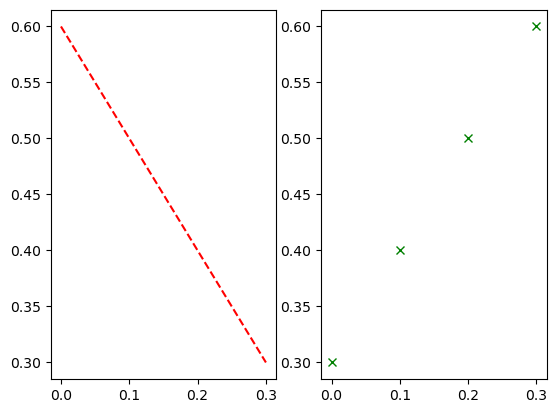

In [56]:
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2);
ax1.plot((0,.1,.2,.3),(.6,.5,.4,.3),'r--');
ax2.plot((0,.1,.2,.3),(.3,.4,.5,.6),'gx');
# plt.show() # not needed in Jupyter Notebook but needed
# in Python ot iPhyton text interface

## `sympy`

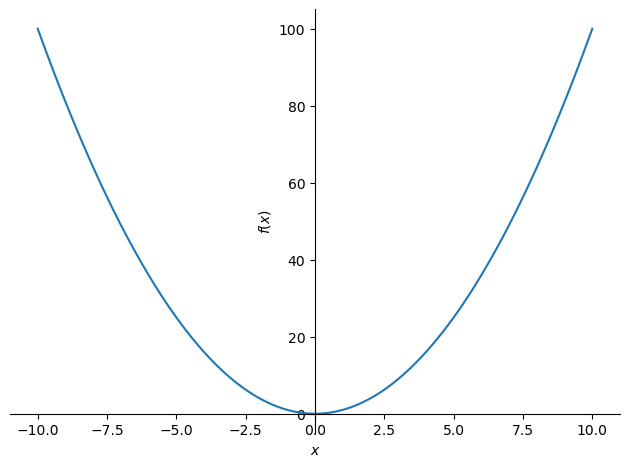

In [57]:
from sympy import symbols
from sympy.plotting import plot
x=symbols('x')
plot(x*x)

# External operations

## Save drawing to PDF file

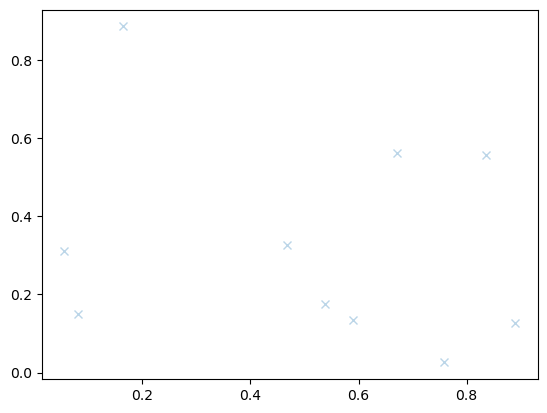

In [66]:
import matplotlib.pyplot as plt
n=10
plt.plot(
    list(random_batch(n)),list(random_batch(n)),'x',alpha=.3)
plt.savefig("scatter.pdf",format="pdf",bbox_inches="tight")

## Save and run program from IPython

In [69]:
# roots of 2nd degree equation
a=1
b=-(2+9)
c=2*9
print([(-b+ε*(b**2-4*a*c)**(1/2))/(2*a) for ε in [-1,1]])
"""my Python program"""

[2.0, 9.0]


'my Python program'

In [70]:
%save roots.py 69 # set this number to previous cell number

File `roots.py` exists. Overwrite (y/[N])?   y


The following commands were written to file `roots.py`:
# roots of 2nd degree equation
a=1
b=-(2+9)
c=2*9
print([(-b+ε*(b**2-4*a*c)**(1/2))/(2*a) for ε in [-1,1]])
"""my Python program"""


In [71]:
%run roots.py

[2.0, 9.0]


The first line of a program beginning with <code>#!</code>, "shebang", informs the Unix shell on how to interpret it.

If file is imported as module, then <code>\__name__</code> is automatically set to the module name, else  <code>\__main__</code>.

In [72]:
%cat Fibonacci.py

#!/usr/bin/env python3
def fib(n):
    """Prints Fibonnacci up to n-th term."""
    a, b = 0, 1
    while b < n:
        print(b, end=' ')
        a, b = b, a + b
    print('\n') 


def fib1(n):
    """ Returns Fibonacci sequence up to n-th term in a list."""
    result = []
    a, b = 0, 1
    while a < n:
        result.append(a)
        a, b = b, a+b
    return result

if __name__ == "__main__":
    print("This file is not loaded as a module.")
    
else:
    print("This file is loaded as module ",__name__,".")




In [75]:
%run Fibonacci.py # not loaded as module

This file is not loaded as a module.


In [76]:
fib(10)
fib1(10)

1 1 2 3 5 8 



[0, 1, 1, 2, 3, 5, 8]

In [136]:
import Fibonacci

This file is loaded as module  Fibonacci .


In [137]:
Fibonacci.fib(10)
Fibonacci.fib1(10)

1 1 2 3 5 8 



[0, 1, 1, 2, 3, 5, 8]

Check path:

In [77]:
import sys
sys.path # youy stuff first

['/home/alba/.conda/envs/my_base/lib/python311.zip',
 '/home/alba/.conda/envs/my_base/lib/python3.11',
 '/home/alba/.conda/envs/my_base/lib/python3.11/lib-dynload',
 '',
 '/home/alba/.local/lib/python3.11/site-packages',
 '/home/alba/.conda/envs/my_base/lib/python3.11/site-packages']

## Run Python program in Unix command line

Python script takes argument from the Unix shell command line:

In [20]:
!cat argv.py
print("__________________________________")
!argv.py hello  # <- arg passed by shell

#!/usr/bin/env python3
# usage: % python argv.py bonjour 
if __name__ == "__main__":
    import sys
    print(sys.argv[1])
 # else argv is useless
__________________________________
hello


## Python script

In [29]:
import os

In [30]:
os.getenv("HOME")

'/home/alba'

In [31]:
os.getcwd()

"/home/alba/Documents/projet/Python's belly"

In [32]:
os.stat(os.getcwd())

os.stat_result(st_mode=16889, st_ino=29502066, st_dev=2050, st_nlink=5, st_uid=1000, st_gid=1000, st_size=4096, st_atime=1715156517, st_mtime=1715193615, st_ctime=1715193615)

In [33]:
os.listdir()[10]

'argv.py'

In [34]:
os.path.splitext(os.listdir()[10])

('argv', '.py')

## Input, output, stream, `with`

In [161]:
print('What is your age?')
age=int(input())
print('Next year you age will be '+str(age+1))

What is your age?
57
Next year you age will be 58


Read line by line completely, `with` takes care of closing:

In [162]:
with open('executable.py') as stream1:
    while len(line:=stream1.readline())!=0:
        # here you can transform each line
        # like awk
        print(line,end='')

#!/usr/bin/env python
import math
print("Yes this is",math.pi,"thon.")



Read down to word:

In [163]:
import re
with open('Fibonacci.py') as stream1:
    header=''
    while True:
        line=stream1.readline()
        header+=line
        if re.match('.*end',line) or len(line)==0:
            break

print(header)

#!/usr/bin/env python3
def fib(n):
    """Prints Fibonnacci up to n-th term."""
    a, b = 0, 1
    while b < n:
        print(b, end=' ')



In [169]:
with open("roots.py") as stream1:
    exec(stream1.read())

[2.0, 9.0]


Inline openfile simulates an open text file: 

In [165]:
import io
stream1=io.StringIO("20170607	53086			Enedis")

In [166]:
stream1.readline()

'20170607\t53086\t\t\tEnedis'

## Connected device

Raspberry Pi

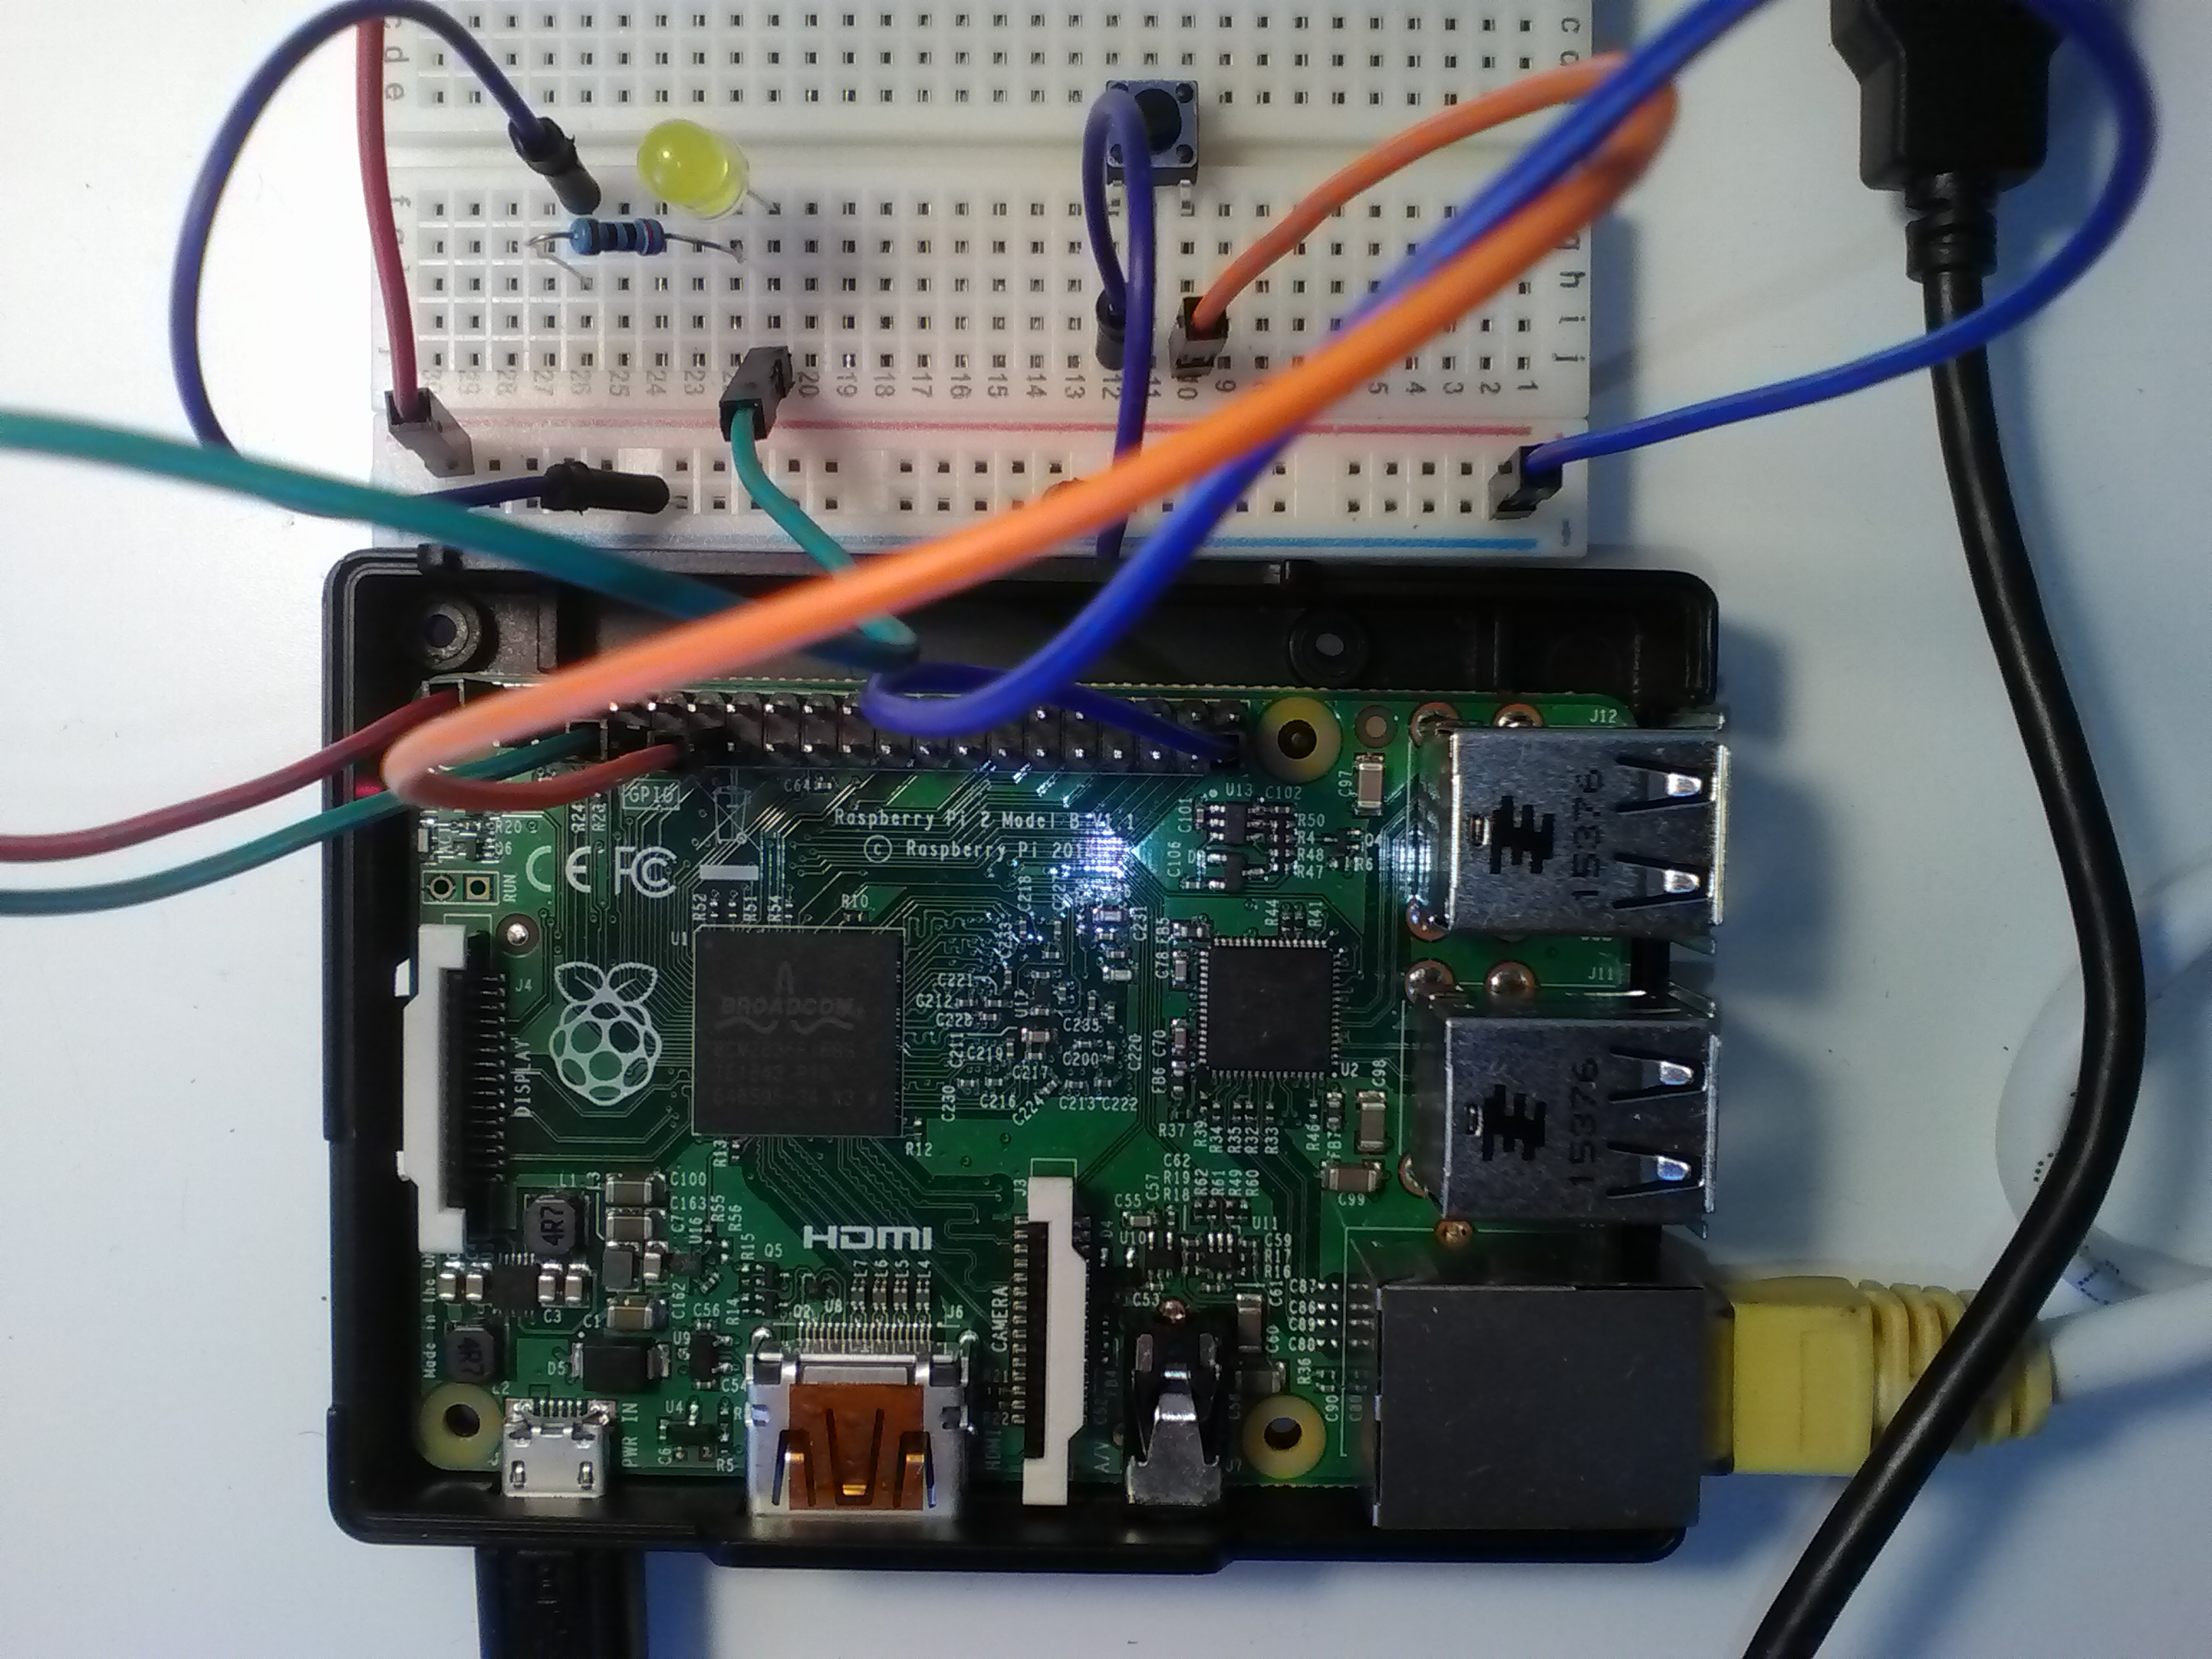 

A blinking LED can be turned on and off by pressing a button (not a switch).

In [7]:
%cat "LED+pb.py"

#!/usr/bin/env python3
from RPi.GPIO import *
import time
setmode(BCM) # pin number relative to BCM chip
setup(4,OUT) # where LED

setup(17,IN,pull_up_down=PUD_UP) # push button, default 1

pressed=False

print("Push button to start.")
while True:
    time.sleep(.01)
    if input(17)==0:
        pressed=not(pressed)
        time.sleep(.5) # max push time
    elif pressed:
        output(4,1)
        time.sleep(.05)
        output(4,0)
        time.sleep(.5)
    else:
        continue



In order to turn off the flashing LED, on must be lucky enough to push at the right moment yet not too long, or else it will be considered as pushing twice.  This can be improved with module <code>asyncio</code>.

In [31]:
%autoawait?

## Internet

In [25]:
import smtplib

In [ ]:
server=smtplib.SMTP('smtp.orange.fr')

In [ ]:
# help(server.sendmail)

In [ ]:
msg='''\
From: xxx.albarede@orange.fr
To: yyy.albarede@free.fr
Subject: calcul termine

test 1900'''

print(msg)

In [ ]:
server.sendmail('any.body@free.fr','pierre.albarede@free.fr',msg)

ftp client

http web server

In [ ]:
!python -m http.server -d ~/Pictures

Serving HTTP on 0.0.0.0 port 8000 (http://0.0.0.0:8000/) ...


# High level Python modules

## Homogeneous array: `numpy`

In [83]:
import numpy as np
np.version.version

'1.26.4'

In [ ]:
np.array([(1.5,2,3),(4,5,6)])

np.array([[1.5,2,3],[4,5,6]])

np.ones((2,3,4))

In [ ]:
np.arange(0,5,.5)

np.linspace(0,5,11)

In [ ]:
np.linspace(0,11.5,24).reshape(2,3,4) 

In [ ]:
np.cos(np.arange(0,1,.2)*np.pi)

In [ ]:
np.array([[0, 1, 2, 3],
          [4, 5, 6, 7],
          [8, 9,10,11]]).sum(axis=0)  

In [ ]:
np.array([[0, 1, 2, 3],
          [4, 5, 6, 7],
          [8, 9,10,11]]).sum(axis=1) 

In [ ]:
np.array([[ 0,  1,  2,  3],
          [10, 11, 12, 13],
          [20, 21, 22, 23],
          [30, 31, 32, 33],
          [40, 41, 42, 43]])[:,::-1]

In [ ]:
np.array([[ 1,  2],
          [11, 12],
          [21, 22],
          [31, 32],
          [41, 42]]).transpose()

np.array([[ 1,  2],
          [11, 12],
          [21, 22],
          [31, 32],
          [41, 42]]).ravel()

In [ ]:
np.apply_along_axis(
    sum,
    0,
    np.array([
        [ 1,  2],
        [11, 12],
        [21, 22],
        [31, 32],
        [41, 42]])
                   )

np.apply_along_axis(
    sum,
    1,
    np.array([
        [ 1,  2],
        [11, 12],
        [21, 22],
        [31, 32],
        [41, 42]])
                   )

In [ ]:
np.vectorize(int)([['1','2','3','4','5'],['7','2','3','4','5']])



## Numerical analysis: `scipy`

In [ ]:
import numpy as np

https://docs.scipy.org/doc/scipy/tutorial/integrate.html

In [ ]:
from scipy.integrate import odeint
from scipy.special import gamma, airy

y1_0 = 1.0 / 3**(2.0/3.0) / gamma(2.0/3.0)
y0_0 = -1.0 / 3**(1.0/3.0) / gamma(1.0/3.0)
y0 = [y0_0, y1_0]

def func(y, t):
     return [t*y[1],y[0]]
    
def gradient(y, t):
     return [[0,t], [1,0]]

In [ ]:
x = np.arange(0, 4.0, 0.01)
t = x
ychk = airy(x)[0]

In [ ]:
y = odeint(func, y0, t)
y2= odeint(func, y0, t, Dfun=gradient)

In [ ]:
ychk[:36:6]
y[:36:6,1]
y2[:36:6,1]


## Heterogeneous array: `pandas`

In [35]:
import pandas as pd

In [36]:
series=pd.Series([1,3,3],['eau','HP','HC'])
series

eau    1
HP     3
HC     3
dtype: int64

In [37]:
pd.Series([0,1,1],index=series.index)

eau    0
HP     1
HC     1
dtype: int64

In [38]:
series.update(_)
series

eau    0
HP     1
HC     1
dtype: int64

In [48]:
df=pd.read_csv('compteurs.txt', sep='\t',index_col=0,nrows=5)
df

élec.  gaz  eau  copies  Unnamed: 5
date                                          
20140908   49513  145   40     NaN         NaN
20141123   49674  152   50     NaN         NaN
20150403   50393  194   69     NaN         NaN
20150912   51089  230  118     NaN         NaN
20151215   51264  235  122     NaN         NaN

In [49]:
type(df)

pandas.core.frame.DataFrame

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [51]:
df.index # axis 0
df.columns # axis 1

Index([20140908, 20141123, 20150403, 20150912, 20151215], dtype='int64', name='date    ')

Index([' élec.', 'gaz', 'eau', 'copies', 'Unnamed: 5'], dtype='object')

Many ways to access data:

In [52]:
df['gaz']

date    
20140908    145
20141123    152
20150403    194
20150912    230
20151215    235
Name: gaz, dtype: int64

In [53]:
df.gaz

date    
20140908    145
20141123    152
20150403    194
20150912    230
20151215    235
Name: gaz, dtype: int64

In [54]:
df.loc[:,'gaz']

date    
20140908    145
20141123    152
20150403    194
20150912    230
20151215    235
Name: gaz, dtype: int64

In [55]:
df.gaz[0:3]

date    
20140908    145
20141123    152
20150403    194
Name: gaz, dtype: int64

In [56]:
df.loc[df.gaz>200]

élec.  gaz  eau  copies  Unnamed: 5
date                                          
20150912   51089  230  118     NaN         NaN
20151215   51264  235  122     NaN         NaN

In [57]:
df.loc[df.gaz>200,'eau']

date    
20150912    118
20151215    122
Name: eau, dtype: int64

In [58]:
df.loc[df.index==20150912]

élec.  gaz  eau  copies  Unnamed: 5
date                                          
20150912   51089  230  118     NaN         NaN

In [59]:
df.iloc[2,2]

69

Drop any unnamed column:

In [60]:
df.drop(df.filter(like='Unnamed',axis=1).columns,axis=1)

élec.  gaz  eau  copies
date                              
20140908   49513  145   40     NaN
20141123   49674  152   50     NaN
20150403   50393  194   69     NaN
20150912   51089  230  118     NaN
20151215   51264  235  122     NaN

In [62]:
# !pip install pydataset

In [64]:
from pydataset import data

In [65]:
quakes = data('quakes').loc[:5]
quakes


lat    long  depth  mag  stations
1 -20.42  181.62    562  4.8        41
2 -20.62  181.03    650  4.2        15
3 -26.00  184.10     42  5.4        43
4 -17.97  181.66    626  4.1        19
5 -20.42  181.96    649  4.0        11

Change column order:

In [66]:
quakes1=quakes.drop('stations',axis=1)
quakes1
type(quakes2:=quakes.loc[:,'stations'])
quakes2

lat    long  depth  mag
1 -20.42  181.62    562  4.8
2 -20.62  181.03    650  4.2
3 -26.00  184.10     42  5.4
4 -17.97  181.66    626  4.1
5 -20.42  181.96    649  4.0

pandas.core.series.Series

1    41
2    15
3    43
4    19
5    11
Name: stations, dtype: int64

In [67]:
pd.concat([quakes2,quakes1],axis=1)

stations    lat    long  depth  mag
1        41 -20.42  181.62    562  4.8
2        15 -20.62  181.03    650  4.2
3        43 -26.00  184.10     42  5.4
4        19 -17.97  181.66    626  4.1
5        11 -20.42  181.96    649  4.0

In [68]:
# quakes2.join(quakes1) # error
quakes1.join(quakes2)

lat    long  depth  mag  stations
1 -20.42  181.62    562  4.8        41
2 -20.62  181.03    650  4.2        15
3 -26.00  184.10     42  5.4        43
4 -17.97  181.66    626  4.1        19
5 -20.42  181.96    649  4.0        11

# Conclusion

**Python**

I have tried to explain progressively the most useful and typical features of Python.

Wtih Python, procedural programming is possible but many features cannot be fully understood.  Functional programming seems to be possible with some effort.  The natural way of programming is based on variables and objects.

The main high level modules are largely independent of eachother and Python.  Using them requires particular knowledge and external documentation.  For example, having general knowledge of Python is necessary but not sufficient for using `pandas` or `matplotlib`.

Overall, Python requires the user to mix different techniques and modules in order to achieve some goal.  

**Comparison Python | Unix shells**

Python competes with and is less tricky than Unix shells, because Python has many types while the Unix shells basically knows character stream (though it also knows numbers and some complex types).

**Comparison Python | Wolfram**

Python is multi-paradigm only in the sense that many paradigms are useful to make it work but one cannot really do everything with any paradigm alone.  Wolfram is multi-paradigm is the sense that one can do everything in any one paradigm, although only the functional paradigm will perform well and object programming is not natural.

For any given task, Python often has many concurrent modules looking like the solution but one may spend time in choosing, understanding, adapting, combining modules, maybe more time than it would take to solve the problem directly. With Wolfram, the probability of a solution out of somebody else's box is smaller, so one is lead to solve the problem directly, and this can be fast, because of the high level, uniformly documented and interfaced functions.

In other words, solving a problem in Python is more like finding the right modules and understanding how to use them.  Solving a problem in Wolfram is more like working out directly a solution without being annoyed by module idiosyncrasy and interfacing.

In Python, class can have functional attribute.  In Wolfram, function applies to data according to patterns.  The same information or functionality is organized differently. 

Wolfram has fewer types (no tuple, iterator, generator and actually relies mostly on one type: expression).  In Python, `list` has `reverse`, `numpy` has `flip` but Wolfram has only one function `Reverse`.  Overriding basic operations is easier and less dangerous in Python than Wolfram. 

The Anaconda distribution of Python is big (~5-15 GB) but one can install less with Miniconda.  Wolfram is about as big as Anaconda, and bigger with the documentation. In the Unix shell command line, `python` starts in some 0,01 s while `wolfram` (or `wolframscript`) starts in seconds, making it unfit for randomly repeating simple tasks (like renaming a file).  

**Comparison Jupyter Notebook | Mathematica front end**

Jupyter Notebook or Lab is basically a web application, running in a web browser (locally or remotely).  Mathematica is a desktop application.  (Actually Jupyter Notebook or Lab is moving to desktop and Mathematica front end has moved to the web.)

Jupyter Notebook is not dynamic, Mathematica front end is dynamic and faster but needs to be adapted to each computer operating systems, which is done only for a small numbers of versions.

Jupyter Notebook kernel may be changed to Wolfram or R.  The Mathematica frontend supports Python kernel.